# **算法名称：Unsupervised Learning - DataScaler**


**1. 类别**
    
    Unsupervised Learning
    DataScaler is a preprocessing step for supervised algorithem. 
    Some algorithems are very sensitive to the scaling of data. To get a better accuracy, we genearlly call data scaler to handle features before training model. 

**2. 数学原理**

- **StandardScaler**
      ensure each feature  ->  the mean is 0 and variance is 1. 
    
     __mean 平均数__:
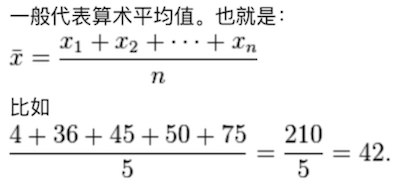
    
     __variance 方差__:
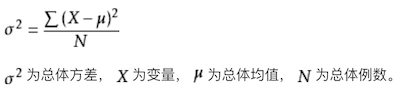

    
- **MinMaxScaler** 
      ensure all features are exactly in feature_range. By default, feature_range is between 0 and 1. 
```
   feature_range=(min, max)，应用的公式为：
   X_std=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
   X_scaled=X_std/(max-min)+min
```
        
- **RobustScaler**
      ensure each feature  ->  the median is 0 and quartiles is 1.
```     
This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
```
        
- **Normalizer** 
      ensure the feature vector has a Eucliden length of 1. 
      
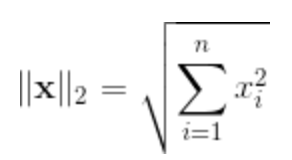
    

Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.0.3
numpy version: 1.16.2
scipy version: 1.2.1
IPython version: 7.4.0
sklearn version: 0.20.3


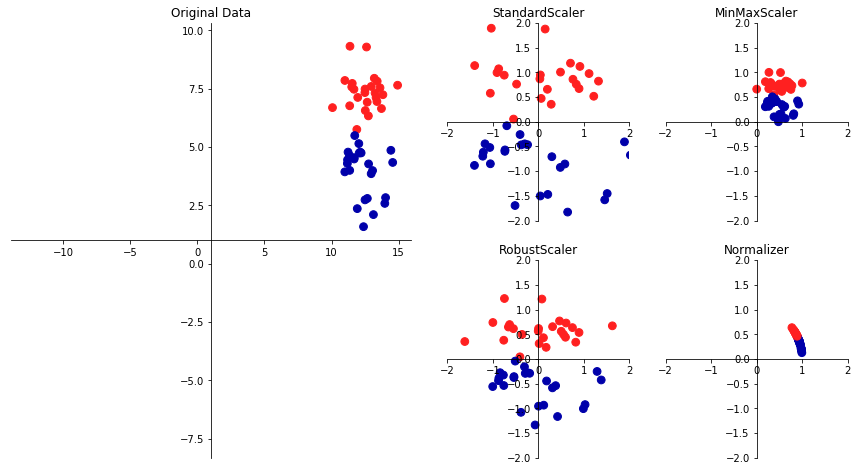

In [25]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib 
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp 
print("scipy version: {}".format(sp.__version__))

import IPython 
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

import warnings
warnings.filterwarnings("ignore")

import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_scaling()
plt.show()

## Applying Data Transformations
---

In [26]:
# load/split dataset 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=1)

print("X_train: {}".format(X_train.shape))
print(X_train[1:3])
print("X_test: {}".format(X_test.shape))
print(X_test[1:3])


X_train: (426, 30)
[[1.205e+01 1.463e+01 7.804e+01 4.493e+02 1.031e-01 9.092e-02 6.592e-02
  2.749e-02 1.675e-01 6.043e-02 2.636e-01 7.294e-01 1.848e+00 1.987e+01
  5.488e-03 1.427e-02 2.322e-02 5.660e-03 1.428e-02 2.422e-03 1.376e+01
  2.070e+01 8.988e+01 5.826e+02 1.494e-01 2.156e-01 3.050e-01 6.548e-02
  2.747e-01 8.301e-02]
 [1.288e+01 1.822e+01 8.445e+01 4.931e+02 1.218e-01 1.661e-01 4.825e-02
  5.303e-02 1.709e-01 7.253e-02 4.426e-01 1.169e+00 3.176e+00 3.437e+01
  5.273e-03 2.329e-02 1.405e-02 1.244e-02 1.816e-02 3.299e-03 1.505e+01
  2.437e+01 9.931e+01 6.747e+02 1.456e-01 2.961e-01 1.246e-01 1.096e-01
  2.582e-01 8.893e-02]]
X_test: (143, 30)
[[1.495e+01 1.757e+01 9.685e+01 6.781e+02 1.167e-01 1.305e-01 1.539e-01
  8.624e-02 1.957e-01 6.216e-02 1.296e+00 1.452e+00 8.419e+00 1.019e+02
  1.000e-02 3.480e-02 6.577e-02 2.801e-02 5.168e-02 2.887e-03 1.855e+01
  2.143e+01 1.214e+02 9.714e+02 1.411e-01 2.164e-01 3.355e-01 1.667e-01
  3.414e-01 7.147e-02]
 [1.461e+01 1.569e+01 9.268e+

---
##  MinMaxScaler 最小最大值标准化
---

```
sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
```

**feature_range** hyperparameter that lets you change the range if you don’t want 0–1 for some reason.


使用这种方法，可以达到：
- 1、对于方差非常小的属性可以增强其稳定性。
- 2、维持稀疏矩阵中为0的条目

Refer:
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [27]:
# import MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [28]:
# transform train data

X_train_scaled = scaler.transform(X_train)

# print dataset properties before and after scaling
print("transformed shape: {}\n".format(X_train_scaled.shape))
print("per-feature minimum before scaling: \n {}".format(X_train.min(axis=0)))
print("per-feature minimun after scaling: \n {}".format(X_train_scaled.min(axis=0)))
print("---------------------------------------")
print("per-feature maximum before scaling: \n {}".format(X_train.max(axis=0)))
print("per-feature maximum after scaling: \n {}".format(X_train_scaled.max(axis=0)))
print("---------------------------------------")
print(X_train[0:5,0])
print(X_train_scaled[0:5,0])

transformed shape: (426, 30)

per-feature minimum before scaling: 
 [6.981e+00 1.038e+01 4.379e+01 1.435e+02 5.263e-02 2.650e-02 0.000e+00
 0.000e+00 1.167e-01 5.025e-02 1.144e-01 3.602e-01 7.570e-01 6.802e+00
 2.667e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 9.502e-04 7.930e+00
 1.249e+01 5.041e+01 1.852e+02 8.409e-02 4.327e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
per-feature minimun after scaling: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
---------------------------------------
per-feature maximum before scaling: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.264e-01
 1.913e-01 2.906e-01 9.575e-02 2.873e+00 3.647e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 5.774e-01 2.075e-01]
per-feature maximum after scaling: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1

In [29]:
# transform test data 
X_test_scaled = scaler.transform(X_test)

# print dataset properties after scaling
print("transformed shape: {}".format(X_test_scaled.shape))

print("per-feature minimun after scaling: \n {}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling: \n {}".format(X_test_scaled.max(axis=0)))

transformed shape: (143, 30)
per-feature minimun after scaling: 
 [ 0.07648256 -0.02318339  0.07117684  0.03295864  0.08919383 -0.02232675
  0.          0.         -0.06152961 -0.00637363 -0.00105126  0.00079104
  0.00067851  0.00079567 -0.0335172  -0.01134793  0.          0.
  0.0233157  -0.00191763  0.03635717 -0.01268556  0.03107724  0.01349292
 -0.09327846 -0.01574803  0.          0.          0.00023759  0.01252788]
per-feature maximum after scaling: 
 [0.8173127  0.76435986 0.84589869 0.68610817 0.83118173 0.89338351
 1.00093809 1.05175118 1.07705578 1.03714286 0.50554629 1.37665815
 0.44117231 0.4224857  0.72596002 0.77972564 0.38762626 0.66054177
 0.75389768 0.75839224 0.80896478 0.88852901 0.75696001 0.66869839
 0.9075879  0.81108275 0.61717252 0.88487973 1.20527441 0.77371114]


---
##  StandardScaler
---

```
sklearn.preprocessing.StandardScaler(copy=True, 
                                     with_mean=True, 
                                     with_std=True)
```
Standardize features by removing the mean and scaling to unit variance
The standard score of a sample x is calculated as: **z = (x - u) / s**
where **u** is the mean of the training samples or 0 if with_mean=False, and **s** is the standard deviation of the training samples or 1 if with_std=False.

Refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

---

In [30]:
# import StandardScaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
# transform train data

X_train_scaled = scaler.transform(X_train)

# print dataset properties before and after scaling
print("transformed shape: {}\n".format(X_train_scaled.shape))
print("per-feature minimum before scaling: \n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling: \n {}".format(X_train.max(axis=0)))
print("---------------------------------------")
print("per-feature minimun after scaling: \n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling: \n {}".format(X_train_scaled.max(axis=0)))
print("---------------------------------------")

print(X_train[0:5,0])
print(X_train_scaled[0:5,0])

transformed shape: (426, 30)

per-feature minimum before scaling: 
 [6.981e+00 1.038e+01 4.379e+01 1.435e+02 5.263e-02 2.650e-02 0.000e+00
 0.000e+00 1.167e-01 5.025e-02 1.144e-01 3.602e-01 7.570e-01 6.802e+00
 2.667e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 9.502e-04 7.930e+00
 1.249e+01 5.041e+01 1.852e+02 8.409e-02 4.327e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
per-feature maximum before scaling: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.264e-01
 1.913e-01 2.906e-01 9.575e-02 2.873e+00 3.647e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 5.774e-01 2.075e-01]
---------------------------------------
per-feature minimun after scaling: 
 [-2.02592853 -2.07835399 -1.97209371 -1.43782431 -3.21063229 -1.48094388
 -1.10227811 -1.25470258 -2.40776935 -1.83591854 -1.0258178  -1.64706194
 -1.00518072 -0.69619129 -1.49412513 -1.22710271 -1.0263303

---
##  RobustScaler
---
```
sklearn.preprocessing.RobustScaler(with_centering=True, 
                                   with_scaling=True, 
                                   quantile_range=(25.0, 75.0), 
                                   copy=True)
```
如果数据包含许多异常值，使用数据的均值和方差的缩放可能无法很好地工作。在这些情况下，您可以使用robust_scale和RobustScaler作为替代替换。 它们对数据的中心和范围使用更稳健的估计。可以使用sklearn.decomposition.PCA或sklearn.decomposition.RandomizedPCA与whiten = True进一步删除特征之间的线性相关。

Refer: http://sklearn.lzjqsdd.com/modules/generated/sklearn.preprocessing.RobustScaler.html

---

In [32]:
# import MinMaxScaler 
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [33]:
# transform train data
X_train_scaled = scaler.transform(X_train)

# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling: \n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling: \n {}".format(X_train.max(axis=0)))
print("---------------------------------------")
print("per-feature minimun after scaling: \n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling: \n {}".format(X_train_scaled.max(axis=0)))
print("---------------------------------------")
print(X_train[0:5,0])
print(X_train_scaled[0:5,0])

transformed shape: (426, 30)
per-feature minimum before scaling: 
 [6.981e+00 1.038e+01 4.379e+01 1.435e+02 5.263e-02 2.650e-02 0.000e+00
 0.000e+00 1.167e-01 5.025e-02 1.144e-01 3.602e-01 7.570e-01 6.802e+00
 2.667e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 9.502e-04 7.930e+00
 1.249e+01 5.041e+01 1.852e+02 8.409e-02 4.327e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
per-feature maximum before scaling: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.264e-01
 1.913e-01 2.906e-01 9.575e-02 2.873e+00 3.647e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 5.774e-01 2.075e-01]
---------------------------------------
per-feature minimun after scaling: 
 [-1.59875467 -1.49933658 -1.49247199 -1.19572693 -2.36251343 -1.01896459
 -0.58381702 -0.67057527 -1.82276657 -1.36438356 -0.83922059 -1.15776436
 -0.8707543  -0.65181027 -1.2445015  -0.87081365 -0.94344403

---
##  Normalizer
---
```
sklearn.preprocessing.Normalizer(norm=’l2’,
                                 copy=True)
```

Refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

---

In [34]:
# import Normalizer 
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(X_train)

Normalizer(copy=True, norm='l2')

In [35]:
# transform train data

X_train_scaled = scaler.transform(X_train)

# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling: \n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling: \n {}".format(X_train.max(axis=0)))
print("per-feature minimun after scaling: \n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling: \n {}".format(X_train_scaled.max(axis=0)))

print(X_train[0:5,0])
print(X_train_scaled[0:5,0])

transformed shape: (426, 30)
per-feature minimum before scaling: 
 [6.981e+00 1.038e+01 4.379e+01 1.435e+02 5.263e-02 2.650e-02 0.000e+00
 0.000e+00 1.167e-01 5.025e-02 1.144e-01 3.602e-01 7.570e-01 6.802e+00
 2.667e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 9.502e-04 7.930e+00
 1.249e+01 5.041e+01 1.852e+02 8.409e-02 4.327e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
per-feature maximum before scaling: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.264e-01
 1.913e-01 2.906e-01 9.575e-02 2.873e+00 3.647e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 5.774e-01 2.075e-01]
per-feature minimun after scaling: 
 [5.51189319e-03 4.56825580e-03 3.63962422e-02 3.76233264e-01
 2.17902707e-05 2.43331790e-05 0.00000000e+00 0.00000000e+00
 4.14296567e-05 1.13032004e-05 1.48040680e-04 2.22630519e-04
 9.18063532e-04 1.22944011e-02 1.17600717e-06 3.16030076e-06
 0

#  Take Care, we need to scale training/test data the same way

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

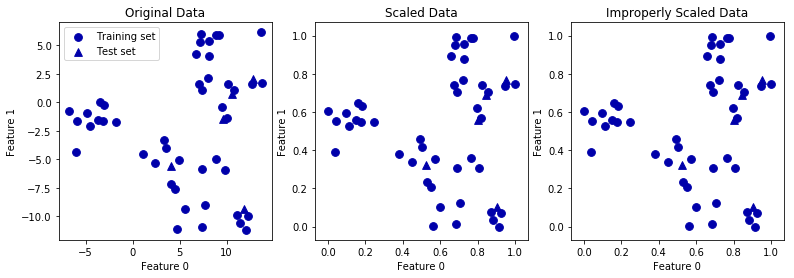

In [36]:
from sklearn.datasets import make_blobs

# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# split it into training and test data set
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], marker='^', c=mglearn.cm2(0), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0), label="Scaled Training set", s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker='^', c=mglearn.cm2(0), label="Scaled Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purpose only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
x_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0), label="Badly Scaled Training set", s=60)
axes[2].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker='^', c=mglearn.cm2(0), label="Badly Scaled Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
plt.show()


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)

# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)

In [38]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled traing data 
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled Test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))
print("A great improvation after 0-1 scaling")

# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled traing data 
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled Test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))
print("A great improvation after zero mean and unit variance scaling")


Test set accuracy: 0.63
Scaled Test set accuracy: 0.97
A great improvation after 0-1 scaling
Scaled Test set accuracy: 0.96
A great improvation after zero mean and unit variance scaling


---
# Example
---

In [39]:
from sklearn import preprocessing
import numpy as np
#1、数据标准化  
 
X = np.array([[ 1., -1.,  2.],
             [ 2.,  0.,  0.],
             [ 0.,  1., -1.]])

print(X)
X_scaled = preprocessing.scale(X)
print("------Show X after preprocessing.scale()-------")
print(X_scaled)

# """
# 输出标准化的结果：
# array([[ 0.        , -1.22474487,  1.33630621],
#        [ 1.22474487,  0.        , -0.26726124],
#        [-1.22474487,  1.22474487, -1.06904497]])
# """
print("输出归一化后的均值")
print(X_scaled.mean(axis=0)) #用于计算均值和标准偏差的轴。如果为0，独立规范每个特征，否则（如果为1）标准化每个样品。

# """
# 输出归一化后的均值：
# array([ 0.,  0.,  0.])
# """
print("输出标准化后的标准差")
print(X_scaled.std(axis=0))

# """
# 输出标准化后的标准差：
# array([ 1.,  1.,  1.])
# """

[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
------Show X after preprocessing.scale()-------
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
输出归一化后的均值
[0. 0. 0.]
输出标准化后的标准差
[1. 1. 1.]


In [40]:
print(X)
print("\n--------------------------------")

#StandardScaler()的参数
"""
StandardScaler() 的参数with_mean 默认为True 表示使用密集矩阵，使用稀疏矩阵则会报错 ，with_mean= False 适用于稀疏矩阵
with_std 默认为True 如果为True，则将数据缩放为单位方差（单位标准偏差）
copy 默认为True 如果为False，避免产生一个副本，并执行inplace缩放。 如果数据不是NumPy数组或scipy.sparse CSR矩阵，则仍可能返回副本
"""
scaler = preprocessing.StandardScaler().fit(X) 
print(scaler)
"""
输出：
StandardScaler(copy=True, with_mean=True, with_std=True)
"""

#StandardScaler()的属性
print("mean: {}".format(scaler.mean_))
"""
输出X（原数据）每列的均值：
array([ 1.        ,  0.        ,  0.33333333])
"""
print("std: {}".format(scaler.scale_))
"""
输出X（原数据）每列的标准差（标准偏差）：
array([ 0.81649658,  0.81649658,  1.24721913])
"""
print("variance: {}".format(scaler.var_))
"""
输出X（原数据）每列的方差：
array([ 0.66666667,  0.66666667,  1.55555556])
"""

#StandardScaler()的方法
print("\n--------------------------------")
print("输出X（原数据）标准化（z-score）:\n")
print(scaler.transform(X))
"""
输出X（原数据）标准化（z-score）：
rray([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])
"""
#  StandardScaler().fit(X) 输入数据用于计算以后缩放的平均值和标准差
#  StandardScaler().fit_transform(X)输入数据，然后转换它
print("参数")
print(scaler.get_params()) #获取此估计量的参数
"""
输出:
{'copy': True, 'with_mean': True, 'with_std': True}
"""
print("\n原数据:\n")
print(scaler.inverse_transform(scaler.transform(X)))#将标准化后的数据转换成原来的数据
"""
输出:
array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])
"""
#scaler.partial_fit(X) 在X缩放以后 在线计算平均值和std
#scaler.set_params(with_mean=False)设置此估计量的参数

[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]

--------------------------------
StandardScaler(copy=True, with_mean=True, with_std=True)
mean: [1.         0.         0.33333333]
std: [0.81649658 0.81649658 1.24721913]
variance: [0.66666667 0.66666667 1.55555556]

--------------------------------
输出X（原数据）标准化（z-score）:

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
参数
{'copy': True, 'with_mean': True, 'with_std': True}

原数据:

[[ 1.00000000e+00 -1.00000000e+00  2.00000000e+00]
 [ 2.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.11022302e-16  1.00000000e+00 -1.00000000e+00]]


'\n输出:\narray([[ 1., -1.,  2.],\n       [ 2.,  0.,  0.],\n       [ 0.,  1., -1.]])\n'

In [41]:
"""
#  训练集数据 例如缩放到[0-1]
"""
print(X)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)
print("\n-----------After MinMaxScaler----------------\n")
print(X_train_minmax)

# """
# 输出训练集：
# array([[ 0.5       ,  0.        ,  1.        ],
#        [ 1.        ,  0.5       ,  0.33333333],
#        [ 0.        ,  1.        ,  0.        ]])
# """


[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]

-----------After MinMaxScaler----------------

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


In [42]:
"""
MaxAbsScaler 通过其最大绝对值来缩放每个特征,范围在[-1,1]。它用于已经以零或稀疏数据为中心的数据，应用于稀疏CSR或CSC矩阵。
X_std = X/每列的最大绝对值
"""
print(X)

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X)
X_train_maxabs

print("\n-----------After MaxAbsScaler----------------\n")
print(X_train_maxabs)
# """
# 输出训练集：
# array([[ 0.5, -1. ,  1. ],
#        [ 1. ,  0. ,  0. ],
#        [ 0. ,  1. , -0.5]])
# """


[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]

-----------After MaxAbsScaler----------------

[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]


In [43]:
print(X)
X_normalized_l2 = preprocessing.normalize(X, norm='l2')
X_normalized_l2
print("\n-----------After L2 normalize----------------\n")
print(X_normalized_l2)

# """
# 输出l2归一化：
# array([[ 0.40824829, -0.40824829,  0.81649658],
#        [ 1.        ,  0.        ,  0.        ],
#        [ 0.        ,  0.70710678, -0.70710678]])
# """

normalizer = preprocessing.Normalizer(norm='l1').fit(X)  # fit 无用
X_normalized_l1 = normalizer.transform(X)
print("\n-----------After L1 normalize----------------\n")
print(X_normalized_l1)

# """
# 输出：
# array([[ 0.25, -0.25,  0.5 ],
#        [ 1.  ,  0.  ,  0.  ],
#        [ 0.  ,  0.5 , -0.5 ]])
# """

[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]

-----------After L2 normalize----------------

[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]

-----------After L1 normalize----------------

[[ 0.25 -0.25  0.5 ]
 [ 1.    0.    0.  ]
 [ 0.    0.5  -0.5 ]]


In [44]:
'''
特征二值化是将数值特征阈值化以获得布尔值的过程。 
'''
print(X)

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer
print(binarizer)

# """
# 输出：
# Binarizer(copy=True, threshold=0.0)
# """

binarizer.transform(X)
print("\n-----------After Binarizer----------------\n")
print(binarizer.transform(X))
 
"""
 输出：
 array([[ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])
"""

#可以调整二值化器的阈值
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)
'''
输出：
array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.]])
'''

[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
Binarizer(copy=True, threshold=0.0)

-----------After Binarizer----------------

[[1. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


'\n输出：\narray([[ 0.,  0.,  1.],\n       [ 1.,  0.,  0.],\n       [ 0.,  0.,  0.]])\n'

In [45]:
'''
分类特征编码

     通常来说，特征不都是连续的值而是由分类给出的。例如，一个人可以具有如下特征：
       ["male", "female"]
       ["from Europe", "from US", "from Asia"]
       ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]
      这样的特征可以被有效地整合在一起然后进行编码，比如：
       ["male", "from US", "uses Internet Explorer"] 可以用[0, 1, 3]表示
       ["female", "from Asia", "uses Chrome"] 可以用[1, 2, 1]表示
  但是，这样的表示不能用于Sklearn进行估计，因为离散（分类）特征，将特征值转化成数字时往往是不连续的。
  OneHotEncoder函数通过one-of-K （k之一）和 one-hot(独热)编码来解决这个问题。
'''

enc = preprocessing.OneHotEncoder()
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]) 
"""
输出：
OneHotEncoder(categorical_features='all', dtype=<class 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)
"""
enc.transform([[0, 1, 3]]).toarray()
"""
输出：
array([[ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]])
"""
 
"""
默认情况下，每个要素可以自动从数据集中推断出多少值。可以使用参数n_values显式地指定它。
在我们的数据集中有两个性别，三个可能的大陆和四个网络浏览器。然后我们拟合估计器，并变换数据点。
结果:前两个数字编码性别，三个数字的大陆和四个数字的为网络浏览器。
"""
#注意，如果存在训练数据可能缺少分类特征的可能性，则必须显式地设置n_value。例如，
enc = preprocessing.OneHotEncoder(n_values=[2, 3, 4])
#请注意，第2个和第3个特征缺少分类值 第一个特征不缺少（有0，1）
enc.fit([[1, 2, 3], [0, 2, 0]])
"""
输出：
OneHotEncoder(categorical_features='all', dtype=<class 'float'>,
       handle_unknown='error', n_values=[2, 3, 4], sparse=True)
"""
enc.transform([[1, 0, 0]]).toarray()
"""
输出：
array([[ 0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.]])
"""

'\n输出：\narray([[ 0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.]])\n'

In [46]:
'''
由于各种原因，许多现实世界数据集包含缺失值，通常编码为空白，NaN或其他占位符。
然而，这样的数据集与scikit-learn估计器不兼容，scikit-learn估计器假定数组中的所有值都是数字的，并且都具有和保持意义。
使用不完整数据集的基本策略是丢弃包含缺少值的整个行和/或列。然而，这是以丢失可能有价值的数据（即使不完全）为代价。
一个更好的策略是插补缺失值，即从数据的已知部分推断它们。 
Imputer类提供了输入缺失值的基本策略，使用缺失值所在的行或列的平均值，中值或最常见的值。这个类还允许不同的缺失值编码。
'''

#以下代码段演示了如何使用包含缺少值的列（轴0）的平均值替换编码为np.nan的缺失值：
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) # missing_values：integer/“NaN”, strategy：mean/median/most_frequent
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
"""
输出：
Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)
"""
X = [[np.nan, 2], [6, np.nan], [7, 6]]
imp.transform(X)
"""
输出：
array([[ 4.        ,  2.        ],
       [ 6.        ,  3.66666667],
       [ 7.        ,  6.        ]])
"""
#Imputer类还支持稀疏矩阵：
import scipy.sparse as sp
X = sp.csc_matrix([[1, 2], [0, 3], [7, 6]])
imp = Imputer(missing_values=0, strategy='mean', axis=0)
imp.fit(X)
"""
Imputer(axis=0, copy=True, missing_values=0, strategy='mean', verbose=0)
"""
X_test = sp.csc_matrix([[0, 2], [6, 0], [7, 6]])
imp.transform(X_test)
"""
输出：
array([[ 4.        ,  2.        ],
       [ 6.        ,  3.66666667],
       [ 7.        ,  6.        ]])
"""

'\n输出：\narray([[ 4.        ,  2.        ],\n       [ 6.        ,  3.66666667],\n       [ 7.        ,  6.        ]])\n'

In [47]:
'''
通常，通过考虑输入数据的非线性特征来增加模型的复杂性是有用的。使用的一种简单和常见的方法是多项式特征，其可以获得特征的高阶和交互项。它在PolynomialFeatures中实现。注意，当使用多项式核函数时，多项式特征在内核方法（例如，sklearn.svm.SVC，sklearn.decomposition.KernelPCA）中被隐含地使用。
'''

from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X
"""
输出：
array([[0, 1],
       [2, 3],
       [4, 5]])
"""
poly = PolynomialFeatures(2)
poly.fit_transform(X)        
"""
输出：
array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])
       
从X(X_1, X_2) 到X(1, X_1, X_2, X_1^2, X_1X_2, X_2^2).
"""
 
#在某些情况下，只需要特征之间的交互项，并且可以通过设置获得
X = np.arange(9).reshape(3, 3)
X   
"""
输出：
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])
"""
poly = PolynomialFeatures(degree=3, interaction_only=True)
poly.fit_transform(X) 
"""
输出：
array([[   1.,    0.,    1.,    2.,    0.,    0.,    2.,    0.],
       [   1.,    3.,    4.,    5.,   12.,   15.,   20.,   60.],
       [   1.,    6.,    7.,    8.,   42.,   48.,   56.,  336.]])
       
从(X_1, X_2, X_3) 到 (1, X_1, X_2, X_3, X_1X_2, X_1X_3, X_2X_3, X_1X_2X_3).
"""

'\n输出：\narray([[   1.,    0.,    1.,    2.,    0.,    0.,    2.,    0.],\n       [   1.,    3.,    4.,    5.,   12.,   15.,   20.,   60.],\n       [   1.,    6.,    7.,    8.,   42.,   48.,   56.,  336.]])\n       \n从(X_1, X_2, X_3) 到 (1, X_1, X_2, X_3, X_1X_2, X_1X_3, X_2X_3, X_1X_2X_3).\n'

In [48]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)
"""
输出：
array([[ 0.        ,  0.69314718],
       [ 1.09861229,  1.38629436]])
"""

'\n输出：\narray([[ 0.        ,  0.69314718],\n       [ 1.09861229,  1.38629436]])\n'